In [ ]:
#노이즈가 포함된 이미지를 복원

In [1]:
import torch
import pickle
shp_original_img = (100, 100)
broken_image = torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

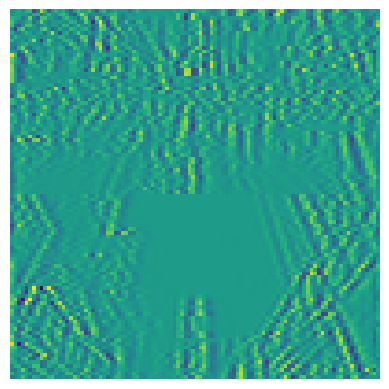

In [2]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#오염된 이미지
plt.imshow(broken_image.view(100,100))
plt.axis('off')
plt.show()

In [3]:
#이미지에 노이즈를 추가하는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0) #텐서 연결
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0 )
    return h

In [4]:
#손실 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [5]:
#랜덤 이미지 텐서
random_tensor = torch.randn(10000, dtype = torch.float)
random_tensor

tensor([-0.6733, -0.0512,  0.4143,  ...,  0.6262,  0.2171,  0.5955])

In [6]:
lr = 0.8
for i in range(0,20000):
    #자동 미분 기능 on
    random_tensor.requires_grad_(True)
    #이미지에 노이즈 추가
    hypothesis = weird_function(random_tensor)
    #오차 계산
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    #자동 미분 기능 off
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.2139892578125
Loss at 1000 = 1.1660813093185425
Loss at 2000 = 0.5614163875579834
Loss at 3000 = 0.3857801556587219
Loss at 4000 = 0.301875501871109
Loss at 5000 = 0.2504693567752838
Loss at 6000 = 0.2137840986251831
Loss at 7000 = 0.18496142327785492
Loss at 8000 = 0.1608288586139679
Loss at 9000 = 0.13969945907592773
Loss at 10000 = 0.12059007585048676
Loss at 11000 = 0.1028929352760315
Loss at 12000 = 0.08621463179588318
Loss at 13000 = 0.0702904611825943
Loss at 14000 = 0.05493750795722008
Loss at 15000 = 0.04002829268574715
Loss at 16000 = 0.025476612150669098
Loss at 17000 = 0.02116120234131813
Loss at 18000 = 0.02116687409579754
Loss at 19000 = 0.021167876198887825


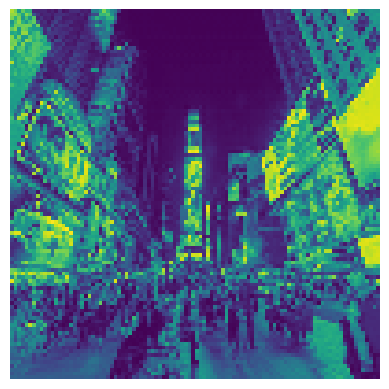

In [7]:
#복원된 이미지
plt.imshow(random_tensor.view(100,100).data)
plt.axis('off')
plt.show()